# Attention Heatmaps for Brain Tumor analysis


In [2]:
# Monter le lecteur de Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Installer TensorFlow GPU
!pip install tensorflow-gpu==2.4.0


Mounted at /content/drive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.8/394.8 MB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 104.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.0/462.0 KB 46.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 91.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 72.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4849 sha256=a2f10ad5f9ed60aae085dd4460405ae430d23df805c7a59ae364b3fc0b51f078
  Stored in directory: /root/.cache/pip/wheels/a0/16/9c/5473df82468f9584454

In [19]:
 # Monter le lecteur de Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Installer TensorFlow GPU
!pip install tensorflow-gpu==2.4.0

# Importer les bibliothèques nécessaires
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
# Répertoires contenant les images d'entraînement
directories = ['glioma_tumor', 'no_tumor','meningioma_tumor','pituitary_tumor']
for directory in directories:
    path = '/content/drive/MyDrive/Projet_IA_Imagerie/dataset/Testing/' + directory + '/'
    for filename in os.listdir(path):
        if filename.endswith('.jpg'):
            img = cv2.imread(os.path.join(path, filename))
            if img is None:
                print("Image not loaded")
            else:
                img = cv2.resize(img, (224, 224))
                # traitement de l'image
                print("Image loaded with shape:", img.shape)

Image loaded with shape: (224, 224, 3)
Image loaded with shape: (224, 224, 3)
Image loaded with shape: (224, 224, 3)
Image loaded with shape: (224, 224, 3)
Image loaded with shape: (224, 224, 3)
Image loaded with shape: (224, 224, 3)
Image loaded with shape: (224, 224, 3)
Image loaded with shape: (224, 224, 3)
Image loaded with shape: (224, 224, 3)
Image loaded with shape: (224, 224, 3)
Image loaded with shape: (224, 224, 3)
Image loaded with shape: (224, 224, 3)
Image loaded with shape: (224, 224, 3)
Image loaded with shape: (224, 224, 3)
Image loaded with shape: (224, 224, 3)
Image loaded with shape: (224, 224, 3)
Image loaded with shape: (224, 224, 3)
Image loaded with shape: (224, 224, 3)
Image loaded with shape: (224, 224, 3)
Image loaded with shape: (224, 224, 3)
Image loaded with shape: (224, 224, 3)
Image loaded with shape: (224, 224, 3)
Image loaded with shape: (224, 224, 3)
Image loaded with shape: (224, 224, 3)
Image loaded with shape: (224, 224, 3)
Image loaded with shape: 

In [163]:
import os
from sklearn.preprocessing import MinMaxScaler

#from tensorflow.keras.layers.preprocessing import CenterCrop
from tensorflow import keras


RESOLUTION = 224
PATCH_SIZE = 16

from PIL import Image, ImageOps

def preprocess_img(image, size=224):
    # Crop the center of the image
    w, h = image.size
    left = (w - size) // 2
    top = (h - size) // 2
    right = (w + size) // 2
    bottom = (h + size) // 2
    img = image.crop((left, top, right, bottom))

    # Resize the image using bicubic interpolation.
    img = img.resize((size, size), resample=Image.BICUBIC)

    # Normalize the image using the ImageNet mean and standard deviation.
    img = np.array(img).astype("float32")
    img = (img / 255.0 - [0.485, 0.456, 0.406]) / [0.229, 0.224, 0.225]

    # Add batch dimension
    img = np.expand_dims(img, axis=0)

    return img



In [165]:
preprocessed_img = preprocess_img(img)


TypeError: ignored

In [145]:
import os
import cv2
import numpy as np

def load_image_from_directory(directory):
    images = []
    labels = []
    label = 0
    
    # Parcourir tous les sous-répertoires du répertoire principal
    for subdir in os.listdir(directory):
        subpath = os.path.join(directory, subdir)
        
        # S'assurer que le sous-répertoire est un dossier et non un fichier
        if os.path.isdir(subpath):
            # Charger toutes les images du sous-répertoire
            for file in os.listdir(subpath):
                filepath = os.path.join(subpath, file)
                # Lire l'image en utilisant OpenCV
                img = cv2.imread(filepath)
                # Ajouter l'image et l'étiquette correspondante aux listes
                images.append(img)
                labels.append(label)
            # Incrémenter l'étiquette pour le sous-répertoire suivant
            label += 1
    
    # Convertir les listes en tableaux NumPy pour le traitement ultérieur
    images = np.array(images)
    labels = np.array(labels)
    
    return images, labels


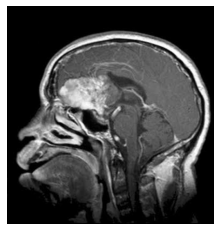

In [87]:
from PIL import Image

directory = '/content/drive/MyDrive/Projet_IA_Imagerie/dataset/Testing/glioma_tumor'
images = load_image_from_directory(directory, model_type="original_vit")

# Affichage de la première image
plt.imshow(images[0][0])
plt.axis("off")
plt.show()


In [142]:
# Récupérer les activations de l'image à un niveau de couche spécifié
def get_activations_at(input_image, i):
  out_layer = tf.keras.applications.ResNet50.layers[i]
  model = tf.keras.models.Model(inputs = tf.keras.applications.ResNet50.inputs, outputs = out_layer.output)
  return model.predict(input_image)

In [154]:
def attention_heatmap(attention_score_dict, image, model_type="dino"):
    num_tokens = 2 if "distilled" in model_type else 1

    # Sort the Transformer blocks in order of their depth.
    attention_score_list = list(attention_score_dict.keys())
    attention_score_list.sort(key=lambda x: int(x.split("_")[-2]), reverse=True)

    # Process the attention maps for overlay.
    w_featmap = image.shape[2] // PATCH_SIZE
    h_featmap = image.shape[1] // PATCH_SIZE
    attention_scores = attention_score_dict[attention_score_list[0]]

    # Taking the representations from CLS token.
    attentions = attention_scores[0, :, 0, num_tokens:].reshape(num_heads, -1)

    # Reshape the attention scores to resemble mini patches.
    attentions = attentions.reshape(num_heads, w_featmap, h_featmap)
    attentions = attentions.transpose((1, 2, 0))

    # Resize the attention patches to 224x224 (224: 14x16).
    attentions = tf.image.resize(
        attentions, size=(h_featmap * PATCH_SIZE, w_featmap * PATCH_SIZE)
    )
    return attentions


In [10]:
# Post-traitement des activations
def postprocess_activations(activations):
  output = np.abs(activations)
  output = np.sum(output, axis = -1).squeeze()
  output = cv2.resize(output, (224, 224))
  output /= output.max()
  output *= 255
  return 255 - output.astype('uint8')

In [164]:
# De-normalize the image for visual clarity.
preprocessed_img = preprocess_img(img)

def postprocess_activations(activations):
  output = np.abs(activations)
  output = np.sum(output, axis = -1).squeeze()
  output = cv2.resize(output, (224, 224))
  output /= output.max()
  output *= 255
  return 255 - output.astype('uint8')

preprocessed_img = preprocess_img(img)

# De-normalize the image for visual clarity.
imgs = load_image_from_directory(directory, model_type="original_vit")

in1k_mean = tf.constant([0.485 * 255, 0.456 * 255, 0.406 * 255])
in1k_std = tf.constant([0.229 * 255, 0.224 * 255, 0.225 * 255])
preprocessed_img_orig = (preprocessed_img * in1k_std) + in1k_mean
preprocessed_img_orig = preprocessed_img_orig / 255.0
preprocessed_img_orig = tf.clip_by_value(preprocessed_img_orig, 0.0, 1.0).numpy()

# Generate the attention heatmaps.
attentions = attention_heatmap(attention_score_dict, preprocessed_img_orig)

# Plot the maps.
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(13, 13))
img_count = 0

for i in range(3):
    for j in range(4):
        if img_count < len(attentions):
            axes[i, j].imshow(preprocessed_img_orig[0])
            axes[i, j].imshow(attentions[..., img_count], cmap="inferno", alpha=0.6)
            axes[i, j].title.set_text(f"Attention head: {img_count}")
            axes[i, j].axis("off")
            img_count += 1

TypeError: ignored